# 빅데이터분석 - 10강 

## Part I. 주소를 지도에 출력하기
- 주소를 지도에 바로 출력해주는 lib도 있지만
- 보통은 좌표를 출력해줌 
- 좌표 <-> 주소 변환 필요성 수시로 발생


주소 수집 -> 주소 가공 -> 좌표로 변환 -> 지도에 출력


## 1. 주소 수집

### 데이터 파일 읽어오기

In [1]:
import pandas as pd

CB = pd.read_csv('CoffeeBean.csv', encoding='CP949', index_col=0, header=0, engine='python')

CB.head()  

,store,address,phone
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320


## 2. 주소 데이터 가공 

### 시/도 행정구역 이름 정규화

In [2]:
addr = []

for address in CB.address:
    split_addr = str(address).split()
    addr.append(split_addr)  # 주소 하나 append


print('데이터 개수 : %d' % len(addr)) 
addr  

데이터 개수 : 243


[['서울시', '강남구', '학동로', '211', '1층'],
 ['서울시', '강남구', '광평로', '280', '수서동', '724호'],
 ['서울시', '강남구', '논현로', '566', '강남차병원1층'],
 ['서울시', '서초구', '강남대로', '369', '1층'],
 ['서울', '강남구', '삼성동', '159', '코엑스몰', '지하2층'],
 ['서울시', '강남구', '압구정로', '46길', '3'],
 ['서울시', '서초구', '서초', '1306-3호'],
 ['서울시', '강남구', '압구정로', '461', '네이처포엠빌딩B108,109호'],
 ['서울시', '강남구', '도산대로', '126'],
 ['서울시', '강남구', '논현로', '842', '압구정빌딩1층'],
 ['서울시', '강남구', '논현로', '512', '지상1,2층'],
 ['서울시', '서초구', '강남대로', '213', '24호', '지하1층'],
 ['서울시', '강남구', '삼성로', '716', 'LEE76빌딩2층'],
 ['서울', '서초구', '반포동', '736-17', 'P빌딩', '2층'],
 ['서울시', '강남구', '언주로', '30길', '10,112', '현대비젼21', '112호'],
 ['서울시', '강남구', '선릉로', '749', '1,2층'],
 ['서울시', '강남구', '테헤란로', '87길', '17', '1층'],
 ['서울시', '서초구', '서초중앙로', '118', '1층'],
 ['서울시', '강남구', '선릉로', '64길', '23', '1층'],
 ['서울시', '강남구', '도산대로49길', '13', '1층', '17,18호'],
 ['서울시', '강남구', '선릉로', '157길', '12', '석전빌딩', '1~4층'],
 ['서울시', '서초구', '강남대로', '51길', '1', '511', 'TOWER', '1층'],
 ['서울시', '강남구', '논현', '231-13

###  addr에서 행정구역 표준 이름이 아닌것 수정하기

-  coding (code부여)의 필요성

In [4]:
addr2 = []

# addr에서 행정구역 표준 이름이 아닌것 수정하기
for i in range(len(addr)):
    if "서울"in addr[i][0] : addr[i][0]="서울특별시"
    elif addr[i][0] == "서울시": addr[i][0]="서울특별시"
    elif addr[i][0] == "부산시": addr[i][0]="부산광역시"
    elif addr[i][0] == "인천": addr[i][0]="인천광역시"
    elif addr[i][0] == "광주": addr[i][0]="광주광역시"
    elif addr[i][0] == "대전시": addr[i][0]="대전광역시"
    elif addr[i][0] == "울산시": addr[i][0]="울산광역시"    
    elif addr[i][0] == "세종시": addr[i][0]="세종특별자치시"
    elif addr[i][0] == "경기": addr[i][0]="경기도"
    elif addr[i][0] == "충북": addr[i][0]="충청북도"
    elif addr[i][0] == "충남": addr[i][0]="충청남도"
    elif addr[i][0] == "전북": addr[i][0]="전라북도"
    elif addr[i][0] == "전남": addr[i][0]="전라남도"
    elif addr[i][0] == "경북": addr[i][0]="경상북도"
    elif addr[i][0] == "경남": addr[i][0]="경상남도"
    elif addr[i][0] == "제주": addr[i][0]="제주특별자치도"
    elif addr[i][0] == "제주도": addr[i][0]="제주특별자치도"
    elif addr[i][0] == "제주시": addr[i][0]="제주특별자치도"                                
       
    addr2.append(' '.join(addr[i]))  # split의 반대, 나눠진 것을 ' '을 중간에 넣고 concat

addr2 

['서울특별시 강남구 학동로 211 1층',
 '서울특별시 강남구 광평로 280 수서동 724호',
 '서울특별시 강남구 논현로 566 강남차병원1층',
 '서울특별시 서초구 강남대로 369 1층',
 '서울특별시 강남구 삼성동 159 코엑스몰 지하2층',
 '서울특별시 강남구 압구정로 46길 3',
 '서울특별시 서초구 서초 1306-3호',
 '서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호',
 '서울특별시 강남구 도산대로 126',
 '서울특별시 강남구 논현로 842 압구정빌딩1층',
 '서울특별시 강남구 논현로 512 지상1,2층',
 '서울특별시 서초구 강남대로 213 24호 지하1층',
 '서울특별시 강남구 삼성로 716 LEE76빌딩2층',
 '서울특별시 서초구 반포동 736-17 P빌딩 2층',
 '서울특별시 강남구 언주로 30길 10,112 현대비젼21 112호',
 '서울특별시 강남구 선릉로 749 1,2층',
 '서울특별시 강남구 테헤란로 87길 17 1층',
 '서울특별시 서초구 서초중앙로 118 1층',
 '서울특별시 강남구 선릉로 64길 23 1층',
 '서울특별시 강남구 도산대로49길 13 1층 17,18호',
 '서울특별시 강남구 선릉로 157길 12 석전빌딩 1~4층',
 '서울특별시 서초구 강남대로 51길 1 511 TOWER 1층',
 '서울특별시 강남구 논현 231-13호 팍스타워지하1층',
 '서울특별시 강남구 영동대로 513 컨벤션별관A동 지하 2층',
 '서울특별시 강남구 영동대로 511 트레이드타워 지하1층',
 '서울특별시 강남구 영동대로 607 12번지 1,2층',
 '서울특별시 강남구 삼성로 85길 11 롯데캐슬아파트생활편익시설동',
 '서울특별시 서초구 신반포로 23 1141호 엘루체백화점내1층1013~1015호',
 '서울특별시 송파구 석촌호수로 118 1층',
 '서울특별시 서초구 서초동 1685-8호 101~2호,113~4호,121호',
 '서울특별시 강남구 논현로 717 1층',
 '서

-  column 추가를 위해 (concat을 위해) dataframe 생성

In [5]:
addr2 = pd.DataFrame(addr2, columns=['address2'])

addr2 

,address2
0,서울특별시 강남구 학동로 211 1층
1,서울특별시 강남구 광평로 280 수서동 724호
2,서울특별시 강남구 논현로 566 강남차병원1층
3,서울특별시 서초구 강남대로 369 1층
4,서울특별시 강남구 삼성동 159 코엑스몰 지하2층
...,...
238,인천광역시 중구 운서동 2868 인천공항 제2터미널 1층 연번(23-124)
239,"부산광역시 부산진구 서전로 12, 1층"
240,경기도 성남시 분당구 야탑로64 DS타워 1층
241,서울특별시 용산구 한강대로95


In [6]:
CB2 = pd.concat([CB, addr2], axis=1)

CB2.head() 

,store,address,phone,address2
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326,서울특별시 강남구 광평로 280 수서동 724호
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320,서울특별시 강남구 삼성동 159 코엑스몰 지하2층


In [8]:
CB2.to_csv('CoffeeBean_2.csv',encoding='CP949', index = False)

## 3. 주소  -> 좌표 변환 (지오코딩)

- Vworld  오픈 API : https://www.vworld.kr/dev/v4api.do
- 지오코딩 api 설명 :  https://www.vworld.kr/dev/v4dv_geocoderguide2_s001.do


### 가입해서 api 키 발급 후 진행 

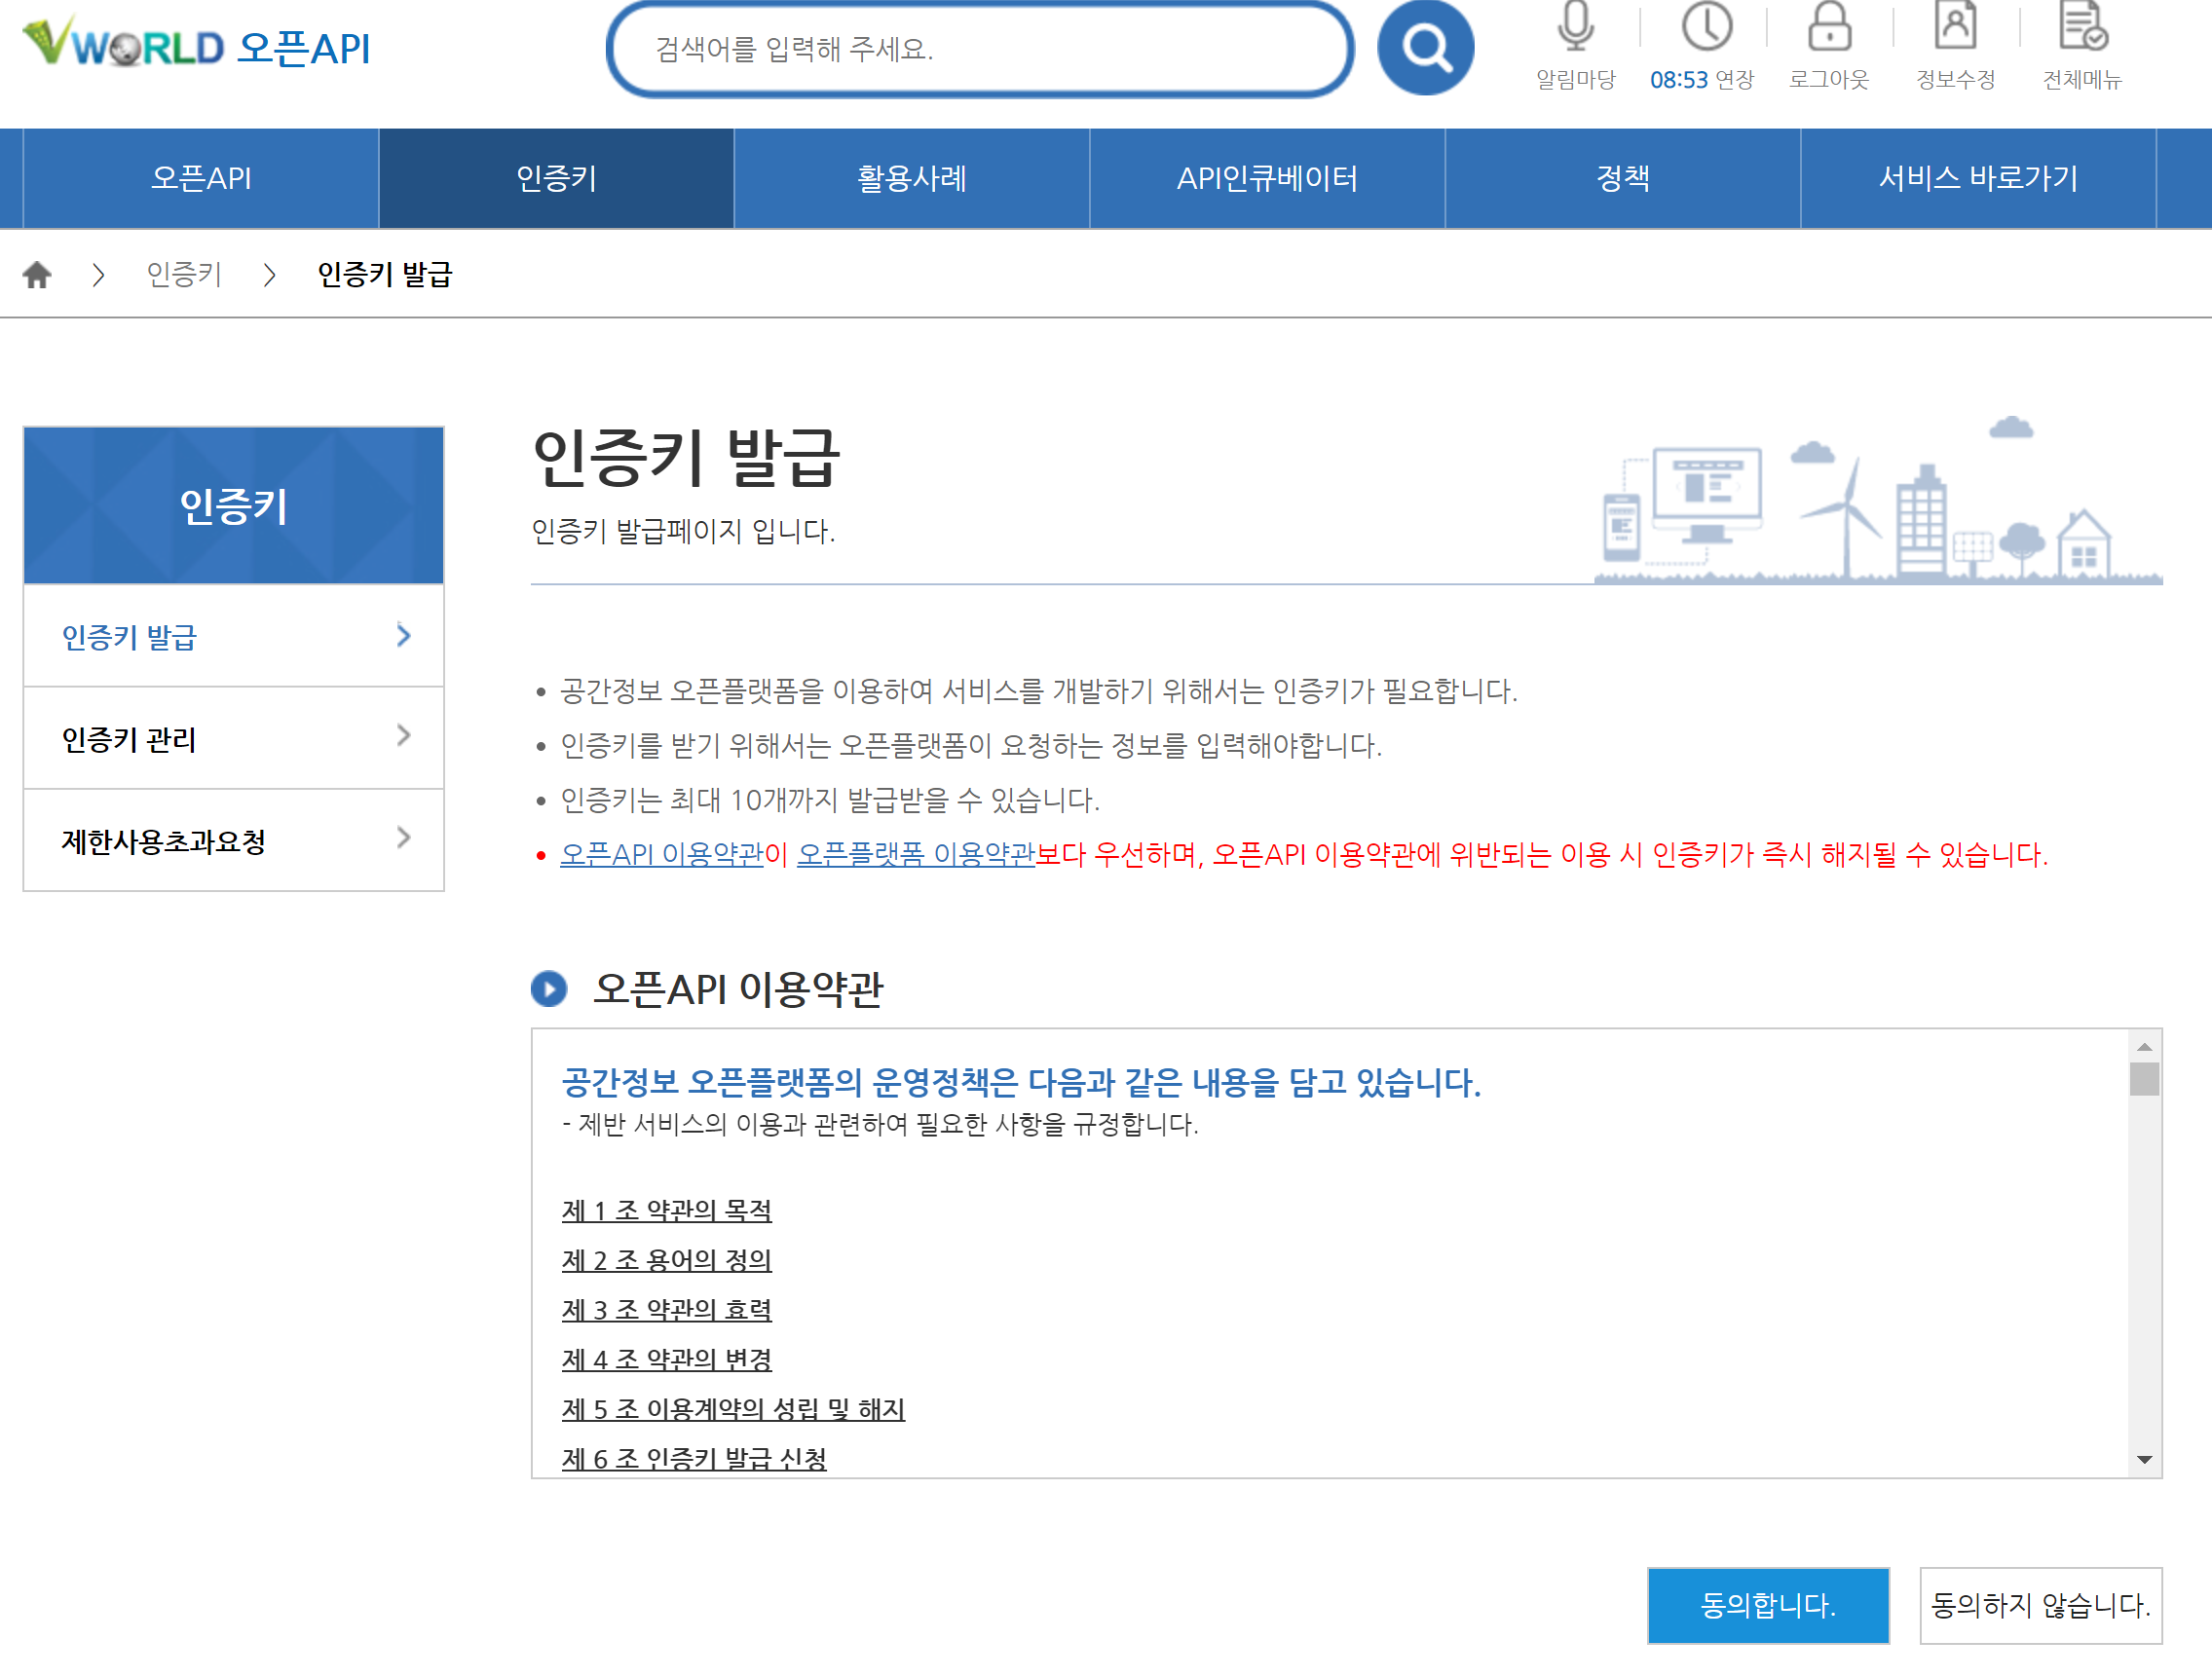

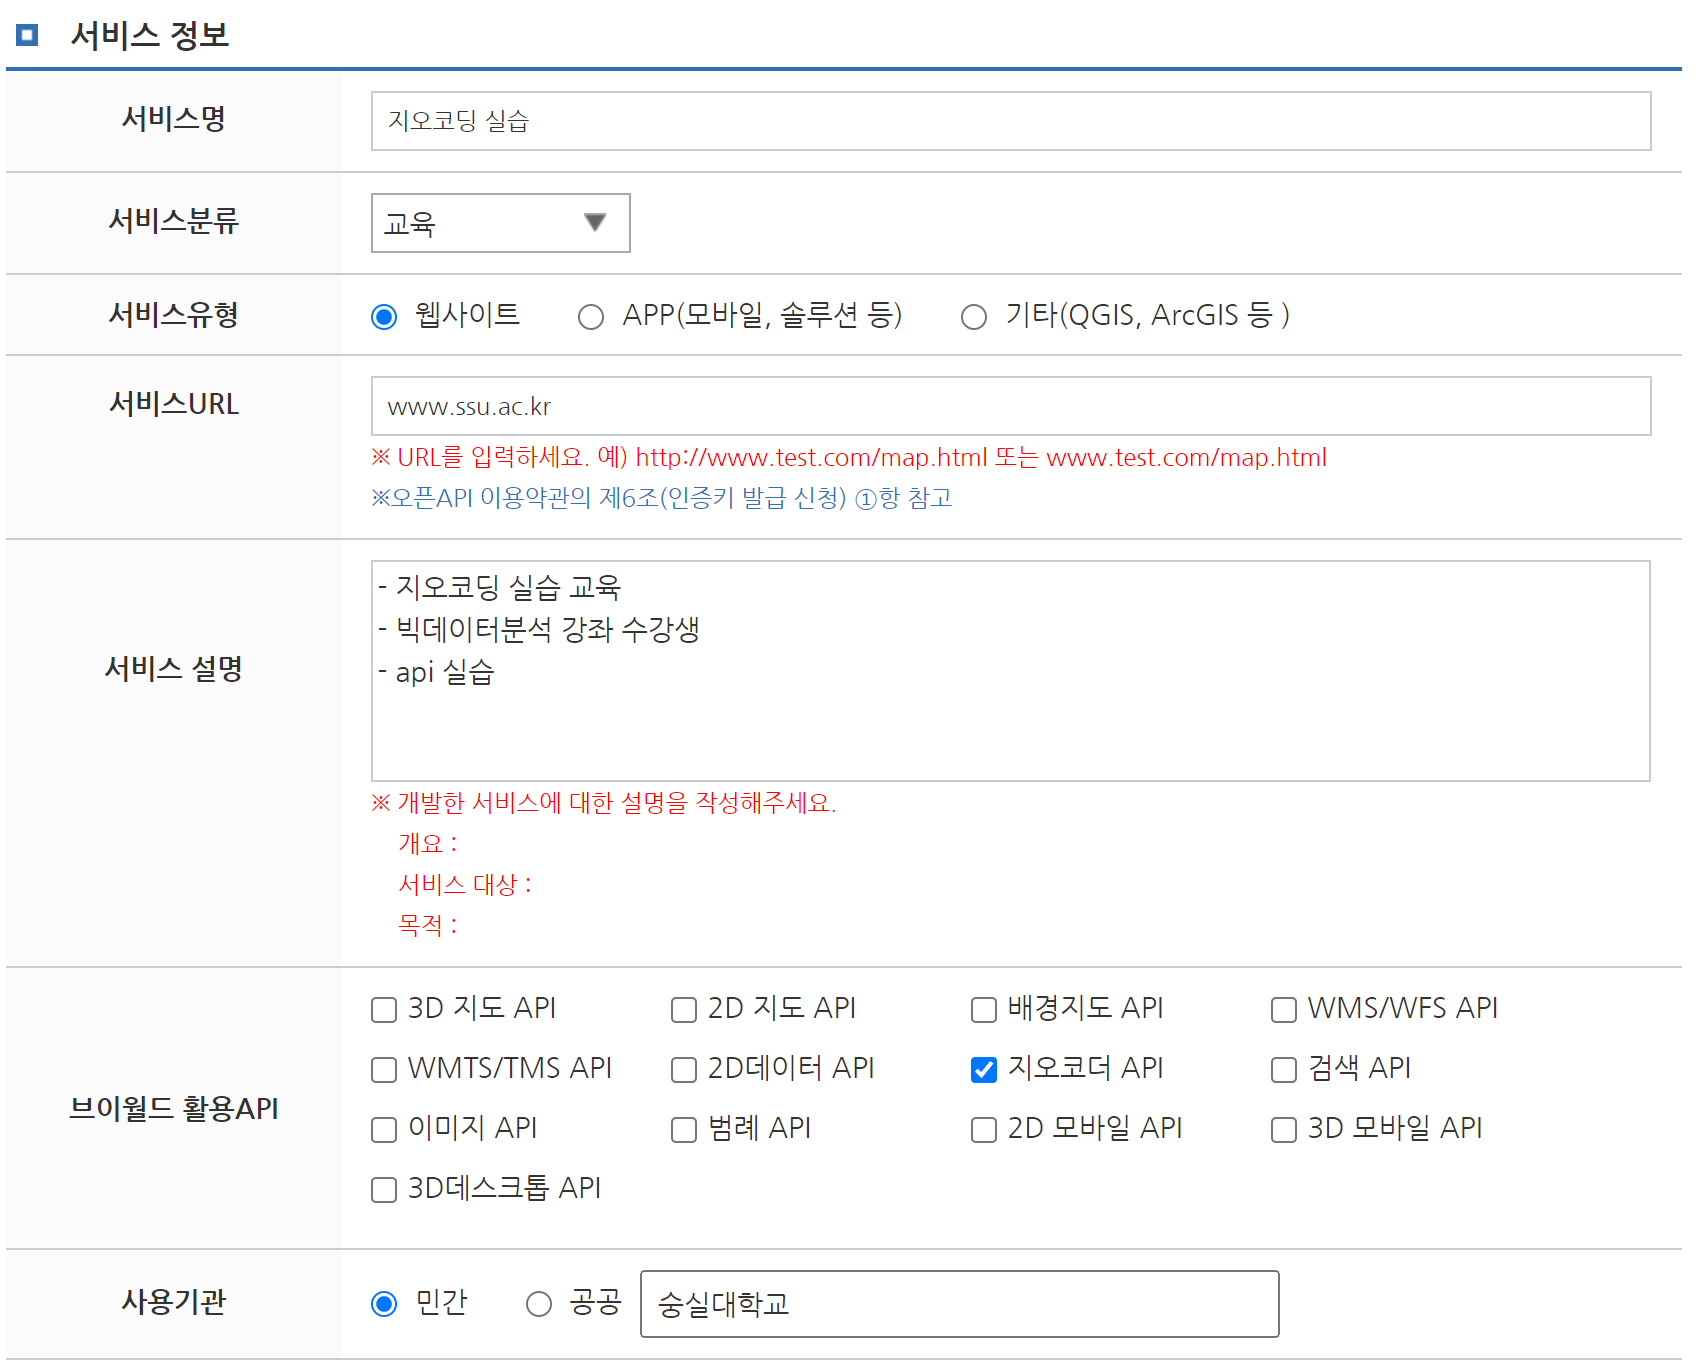

- test

In [19]:
import urllib
import json

# 지번 주소
def getGeoParcelCode(addr) :
    q = urllib.parse.quote(addr)
    data = urllib.request.urlopen("http://api.vworld.kr/req/address?service=address&type=PARCEL&request=getCoord&key=8E930C3E-86BE-3041-9284-671C73EA1A0F&address=" + q )
    result = json.loads(data.read())
    if (result['response']['status'] == 'OK') :
        x = float(result['response']['result']['point']['x'])
        y = float(result['response']['result']['point']['y'])
    else :
        x, y = 0, 0
    return x, y


print(getGeoParcelCode("서울특별시 강남구 삼성동 159"))

(127.058828098481, 37.5125964435431)


## 과제 1: 자기 집주소의 좌표 찍어보기 

In [20]:
# 도로명 주소
def getGeoRoadCode(addr) :
    q = urllib.parse.quote(addr)
    data = urllib.request.urlopen("http://api.vworld.kr/req/address?service=address&type=ROAD&request=getCoord&key=8E930C3E-86BE-3041-9284-671C73EA1A0F&address=" + q )
    result = json.loads(data.read())
    if (result['response']['status'] == 'OK') :
        x = float(result['response']['result']['point']['x'])
        y = float(result['response']['result']['point']['y'])
    else :
        x, y = 0, 0
    return x, y

print(getGeoRoadCode("서울특별시 동작구 상도로 369"))

(126.955071006, 37.496547146)


- 전체 데이터에 대해 좌표 구하여 column 추가하기

In [21]:
cords=[]
for i, item in CB2.iterrows():  # 각 row에 대해 처리 
    cords.append(getGeoParcelCode( item['address2']) )

cords

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (127.058828098481, 37.5125964435431),
 (0, 0),
 (127.025956528824, 37.5005124396654),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (127.02279262094, 37.506790997867),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (127.016463055048, 37.4954582323008),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (126.978862425556, 37.5697634023656),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (126.982946355241, 37.5672975743262),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (127.070939317881, 37.5386643291508),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (129.02933567351, 35.0998764192591),
 (0, 0),
 (0, 0),
 (126.768595566457, 37.6615564809923),
 (0, 0),
 (0, 0),
 (0, 0),
 (127.126346742625, 37.4111493672924),
 (0, 0),
 

- column 합치기

In [22]:
cords = pd.DataFrame(cords, columns=['x','y'])

CB3 = pd.concat([CB2, cords],  axis=1 )

CB3.to_csv('CoffeeBean_3.csv',encoding='CP949', index = False) # 저장하기
    
CB3

,store,address,phone,address2,x,y
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층,0.000000,0.000000
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326,서울특별시 강남구 광평로 280 수서동 724호,0.000000,0.000000
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층,0.000000,0.000000
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층,0.000000,0.000000
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320,서울특별시 강남구 삼성동 159 코엑스몰 지하2층,127.058828,37.512596
...,...,...,...,...,...,...
238,인천공항 제2여객터미널 입구점,인천광역시 중구 운서동 2868 인천공항 제2터미널 1층 연번(23-124),032-743-2894,인천광역시 중구 운서동 2868 인천공항 제2터미널 1층 연번(23-124),126.433772,37.468650
239,부산서면서전로점,"부산광역시 부산진구 서전로 12, 1층",051-819-8708,"부산광역시 부산진구 서전로 12, 1층",0.000000,0.000000
240,분당차병원본관앞점,경기도 성남시 분당구 야탑로64 DS타워 1층,031-8017-8243,경기도 성남시 분당구 야탑로64 DS타워 1층,0.000000,0.000000
241,신용산역래미안점,서울시 용산구 한강대로95,02-2074-1049,서울특별시 용산구 한강대로95,0.000000,0.000000


- 좌표가 제대로 구해지지 않은 경우

In [42]:
CB3[CB3.x==0]

,store,address,phone,address2,x,y
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층,0.0,0.0
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326,서울특별시 강남구 광평로 280 수서동 724호,0.0,0.0
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층,0.0,0.0
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층,0.0,0.0
5,압구정에스점,서울시 강남구 압구정로 46길 3,02-541-5832,서울특별시 강남구 압구정로 46길 3,0.0,0.0
...,...,...,...,...,...,...
237,수원인계DT점,경기도 수원시 팔달구 인계로79 (인계동),031-898-8818,경기도 수원시 팔달구 인계로79 (인계동),0.0,0.0
239,부산서면서전로점,"부산광역시 부산진구 서전로 12, 1층",051-819-8708,"부산광역시 부산진구 서전로 12, 1층",0.0,0.0
240,분당차병원본관앞점,경기도 성남시 분당구 야탑로64 DS타워 1층,031-8017-8243,경기도 성남시 분당구 야탑로64 DS타워 1층,0.0,0.0
241,신용산역래미안점,서울시 용산구 한강대로95,02-2074-1049,서울특별시 용산구 한강대로95,0.0,0.0


### 주소를 아래 단위까지만 사용하도록 trimming 필요
- 지번 주소 : ~ OO동 숫자 (-숫자) 
- 도로명 주소 :~ OO로 숫자 (길 숫자)

### regular expression 
- abc : "abc"와 매치
- \[ \] 사이의 문자들과 match
    - [abc] : abc 중 하나의 문자와 match
    - -는 범위 : [a-zA-Z] : 알파벳 모두, [0-9] : 숫자, [가-힣ㄱ-ㅋ] : 한글 
- ^ : 제외, [^0-9], 숫자가 아닌 것
- . : 아무 문자,  [ab].[cd] axd와 3글자와 매치
- | : 또는 
- 반복 : 
    - \+ : 1개 이상, [가-힣]+  한글 문자열
    - \* : 0개 이상의 문자
    - \? : 있어도 되고 없어도 됨 a?b , "ab" , "b" 와 매치
- 자주 사용하는 패턴
    - \\d - 숫자와 매치, [0-9]와 동일한 표현식
    - \\D - 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식
    - \\s - whitespace 문자와 매치, [ \t\n\r\f\v]와 동일한 표현식. 맨 앞의 빈 칸은 공백문자(space)를 의미
    - \\S - whitespace 문자가 아닌 것과 매치, [^ \t\n\r\f\v]와 동일한 표현식이다.
    - \\w - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.
    - \\W - 문자+숫자(alphanumeric)가 아닌 문자와 매치, [^a-zA-Z0-9_]와 동일한 표현식이다.

### python regular expression 사용
- import re
- p= re.compile ("정규식") 
- m=p.search(입력문자열) : 매칭 시도 , m : 매칭된 객체 , match() 는 처음부터 매치되는지 
- m.group() : 매칭된 객체의 문자열
- p.findall(입력문장열) : 매칭되는 것 모두 찾기


In [25]:
import re
p = re.compile("hello world|text")
p.findall("every programming text begins with hello world")

['text', 'hello world']

In [27]:
p = re.compile("[가-힣]+")
m = p.search("서울특별시 강남구 논현 231-13호 팍스타워지하1층")
m.group()

'서울특별시'

In [28]:
p = re.compile("[ 가-힣]+")
m = p.search("서울특별시 강남구 논현 231-13호 팍스타워지하1층")
m.group()

'서울특별시 강남구 논현 '

In [32]:
p = re.compile("[ 가-힣]+\d+-?\d*")  # [ 가-힣]+  \d+  -?  \d*
m = p.search("서울특별시 강남구 논현 231-13호 팍스타워지하1층")
m.group()

'서울특별시 강남구 논현 231-13'

In [30]:
m = p.search("서울특별시 영등포구 국제금융로10 IFC Mall L2(2층)")
m.group()

'서울특별시 영등포구 국제금융로10'

In [31]:
print(getGeoCode('서울특별시 영등포구 국제금융로10'))

(126.92593686, 37.525058399)


## 과제 2: 변환 안된 경우를 모두 trimming 해 보기
#### 제대로 trimming 안된 경우 정규식 변경
-  getGeoCode() 호출 전에 trimming 하여 호출해보고 결과 확인 

In [49]:
p = re.compile("[ 가-힣]+\d+-?\d*")

count = 0
for i, item in CB2.iterrows():  # 각 row에 대해 처리 
    m = p.search(item['address2'])
    st = m.group()
    x, y = getGeoCode2(st) 
    # print(item['address2'], x, y)
    if x == 0:
        count += 1
        print(item['address2'], x, y)
count

서울특별시 강남구 테헤란로 87길 17 1층 0 0
서울특별시 강남구 선릉로 157길 12 석전빌딩 1~4층 0 0
서울특별시 강남구 삼성로 85길 11 롯데캐슬아파트생활편익시설동 0 0
서울특별시 강남구 도산대로 67길 7,파크빌딩 1층 0 0
서울특별시 중구 순화202 1-94 프레이저플레이스레지던스1층 0 0
경기도 성남시 분당구 황새울로 214번길8 MSPlaza내1층 0 0
서울특별시 강남구 논현로 167길 9 낙산프라자 1층 0 0
서울특별시 성북구 인촌로24길 25 (안암동5가) 2층,3층 0 0
경기도 수원시 영통구 영통로 214번길 8 1층 0 0
부산광역시 해운대구 해운대 해변로277 다옴빌딩1층 0 0
서울특별시 강북구 한천로 139길 25, 1층 일부 및 2층 (수유동 191-70) 0 0
서울특별시 서초구 강남대로 475 2층 0 0


12

## 과제 3: 최대한 변환해서 저장 하기
- getGeoCode() 수정: type =   ROAD 조회후 안되면 PARCEL로 변경해서 시도

In [37]:
def getGeoCode2(addr) :
    q= urllib.parse.quote(addr)
    data = urllib.request.urlopen("http://api.vworld.kr/req/address?service=address&type=ROAD&request=getCoord&key=6CFB8E14-C9B9-3B72-9B1B-9B1A9817E949&address=" + q )
    result = json.loads(data.read())
    if (result['response']['status'] =='OK') :
        x=float(result['response']['result']['point']['x'])
        y=float(result['response']['result']['point']['y'])
    else :
        data = urllib.request.urlopen("http://api.vworld.kr/req/address?service=address&type=PARCEL&request=getCoord&key=6CFB8E14-C9B9-3B72-9B1B-9B1A9817E949&address=" + q )
        result = json.loads(data.read())
        if (result['response']['status'] =='OK') :
            x=float(result['response']['result']['point']['x'])
            y=float(result['response']['result']['point']['y'])
        else:
            x,y=0,0
    return x, y

In [45]:
cords=[]
count=0
for i, item in CB2.iterrows():  # 각 row에 대해 처리 
    x, y = getGeoCode2(item['address2'])  
    if x == 0 :
        count += 1
        print(item['address2'], x, y)
count

서울특별시 강남구 압구정로 46길 3 0 0
서울특별시 강남구 논현 231-13호 팍스타워지하1층 0 0
서울특별시 중구 순화202 1-94 프레이저플레이스레지던스1층 0 0
서울특별시 성북구 개운사길8 101-3 1층 0 0
서울특별시 서대문구 창천 18-26호 B1 0 0
경기도 성남시 분당구 황새울로 214번길8 MSPlaza내1층 0 0
충청북도 청주시 상당구 상당로69번길20 2~4층 0 0
서울특별시 중구 후암로110 581호 서울시티타워1층 0 0
서울특별시 영등포구 국제금융로10 IFC B2층 0 0
서울특별시 강남구 압구정로12길 6 0 0
서울특별시 영등포구 국회대로74길19 동우국제빌딩1층 0 0
서울특별시 강남구 테헤란로143 고운빌딩1층 0 0
서울특별시 강남구 강남대로442 흥국화재빌딩 2층 0 0
서울특별시 구로구 디지털로300 지밸리비즈플라자 2층 0 0
서울특별시 서초구 방배로178 유중아트센터1층 0 0
경기도 성남시 분당구 탄천상로151번길20 월드쇼핑 B동 1층 0 0
서울특별시 강남구 테헤란로87길22 도심공항터미널 지하1층 0 0
서울특별시 영등포구 영중로15 타임스퀘어 1층 0 0
서울특별시 강남구 봉은사로207 KJ타워1층 0 0
서울특별시 성동구 왕십리로241 서울숲더샵 판매시설201동 지하2층 0 0
서울특별시 강남구 테헤란로521 파르나스몰 지하1층 0 0
서울특별시 영등포구 국제금융로8길6 신영증권별관빌딩2층 0 0
서울특별시 서초구 서초대로73길12 세계빌딩1층 0 0
서울특별시 광진구 아차산로563(광장동) 대한제지빌딩 로비층 0 0
서울특별시 송파구 올림픽로100 효창타워1층 0 0
경상북도 포항시 북구 삼호로265번길1 NB-City복합시설1층104호 0 0
서울특별시 관악구 남부순환로1909 1,2층 0 0
인천광역시 중구 공항로272 인천국제공항탑승동3층 FB-C5-57 0 0
인천광역시 중구 공항로272 인천국제공항탑승동3층 FB-C5-68 0 0
서울특별시 용산구 한강대로23길55 현대아이파크몰용

45

## 과제 3.1: 정규식을 변경하여 성능 향상시키기

In [84]:
p = re.compile("[ 가-힣]+\d+[-|길]?\d*")  # ("[\s가-힣]+\d+-?\w*")  # ("[ 가-힣]+\d+[-|길]?\d*[가-힣]?[가-힣]?")

count = 0
for i, item in CB2.iterrows():  # 각 row에 대해 처리 
    m = p.search(item['address2'])
    st = m.group()
    x, y = getGeoCode2(st) 
    # print(item['address2'], x, y)
    if x == 0:
        count += 1
        print(item['address2'], x, y)
count

서울특별시 중구 순화202 1-94 프레이저플레이스레지던스1층 0 0
경기도 성남시 분당구 황새울로 214번길8 MSPlaza내1층 0 0
서울특별시 성북구 인촌로24길 25 (안암동5가) 2층,3층 0 0
경기도 수원시 영통구 영통로 214번길 8 1층 0 0
부산광역시 해운대구 해운대 해변로277 다옴빌딩1층 0 0
서울특별시 서초구 강남대로 475 2층 0 0


6

## 4. 지도에 시각화 

### 지도 정보 시각화 라이브러리 설치 

In [83]:
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 377.7 kB/s eta 0:00:00a 0:00:01


In [87]:
import folium

### 테스트하기
- 중심좌표를 주고 지도 만들기

In [88]:
map_osm = folium.Map(location=[37.514692682, 127.032075128], zoom_start = 13)

- 지도 html로 저장하기

In [89]:
map_osm.save('test_map.html')

import webbrowser
webbrowser.open('test_map.html')

True

### 좌표 파일 로드

In [90]:
CB_file = pd.read_csv('CoffeeBean_3.csv',encoding='cp949',  engine='python')

CB_file.head() 

,store,address,phone,address2,x,y
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층,0.000000,0.000000
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326,서울특별시 강남구 광평로 280 수서동 724호,0.000000,0.000000
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층,0.000000,0.000000
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층,0.000000,0.000000
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320,서울특별시 강남구 삼성동 159 코엑스몰 지하2층,127.058828,37.512596


### GPS 좌표를 지도에 마킹
- folium.Marker ( ) :  지도상에 marker 추가하기

In [91]:
map_CB = folium.Map(location=[37.560284, 126.975334], zoom_start = 15)

for i, store in CB_file.iterrows():   
    if store['y'] > 0 :
        folium.Marker(location=[store['y'], store['x']], popup=store['store'], icon=folium.Icon(color='red', icon='star')).add_to(map_CB)

In [92]:
map_CB.save('map_CB.html')

In [93]:
import webbrowser

webbrowser.open('map_CB.html')

True

---


## Part II. 블록맵 만들기

- 지역 별로 나오는 수치 정보를 시각화 
- 분석?  인구수 대비 숫자가 많은가 적은가 (chi square test ) 
    - 지역 단위 : 6대 권역 (수도권, 강원, 충청, 전라, 경상, 제주),  17개 광역시도(광역단체), 230여 개의 시군구(기초단체)
    - 단위 별로 해놓고 비교
- 미션 : 지역 별 공공보건의료기관 숫자를 비교 (인구 수로 정규화)



## 1. 데이터 전처리 가공

In [230]:
import pandas as pd
pd.set_option('mode.chained_assignment', None) # Warning 방지용
import numpy as np

data = pd.read_csv('공공보건의료기관현황.csv', index_col=0, encoding='CP949', engine='python')

data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [231]:
## 주소에서 시도, 군구 정보 분리

addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(),columns=('광역시도', '시군구'))

addr.head() 

,광역시도,시군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


##  광역시도 이름 확인하기

In [232]:
addr['광역시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

### 잘못된 광역시도 이름 수정 : 창원시, 경산시, 천안시

#### (1) '창원시'를 찾아서 '경상남도 창원시'로 수정

In [97]:
addr[addr['광역시도'] == '창원시']

,광역시도,시군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [233]:
## 표준 행정구역 이름으로 수정 : 창원시-> 경상남도 창원시
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']

In [99]:
addr.iloc[27]

광역시도    경상남도
시군구      창원시
Name: 27, dtype: object

In [234]:
addr.iloc[31]

광역시도    경상남도
시군구      창원시
Name: 31, dtype: object

#### (2) '경산시'를 찾아서 '경상북도 경산시'로 수정

In [235]:
addr[addr['광역시도'] == '경산시']

,광역시도,시군구
47,경산시,경안로


In [236]:
addr.iloc[47] = ['경상북도', '경산시']

addr.iloc[47]

광역시도    경상북도
시군구      경산시
Name: 47, dtype: object

#### (3) '천안시'를 찾아서 '충청남도 천안시'로 수정

In [237]:
addr[addr['광역시도'] == '천안시']

,광역시도,시군구
209,천안시,동남구
210,천안시,동남구


In [238]:
## 표준 행정구역 이름으로 수정 : 천안시-> 충청남도 천안시
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']

In [239]:
addr.iloc[209]

광역시도    충청남도
시군구      천안시
Name: 209, dtype: object

In [106]:
addr.iloc[210]

광역시도    충청남도
시군구      천안시
Name: 210, dtype: object

In [240]:
# 작업 결과 확인하기
addr['광역시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

### 광역시도 이름을 표준이름으로 수정

In [241]:
## 표준 행정구역 이름으로 수정 :  경기 -> 경기도, 경남 -> 경상남도, ...
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', '대전시':'대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}

In [242]:
addr['광역시도']= addr['광역시도'].apply(lambda v: addr_aliases.get(v, v))

In [110]:
# 작업 결과 확인하기
addr['광역시도'].unique()
#len(addr['광역시도'].unique())

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

## 시군구 이름 확인하기 

In [111]:
addr['시군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

###  잘못된 시군구 이름 수정하기 

#### (1) '아란13길' 을 '제주특별자치도'  '제주시'로 수정

In [112]:
addr[addr['시군구'] == '아란13길']

,광역시도,시군구
75,제주특별자치도,아란13길


In [243]:
addr.iloc[75] = ['제주특별자치도', '제주시']

addr.iloc[75]

광역시도    제주특별자치도
시군구         제주시
Name: 75, dtype: object

- 수정 사항 (1차는 skip)

In [244]:
addr.iloc[155] = ['부산광역시', '사하구']
addr.iloc[110] = ['충청북도', '청원구']

In [117]:
addr['시군구'].unique()
len(addr['시군구'].unique())

132

##  행정구역별 공공보건의료기관의 수 구하기

###  '광역시도' 와 '시군구' 컬럼 결합하기

In [245]:
addr['시도군구'] = addr.apply(lambda r: r['광역시도'] + ' ' + r['시군구'], axis=1)

addr

,광역시도,시군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시
...,...,...,...
222,충청북도,제천시,충청북도 제천시
223,충청북도,충주시,충청북도 충주시
224,충청북도,충주시,충청북도 충주시
225,충청북도,영동군,충청북도 영동군


In [246]:
addr['count'] = 0  # 의료기관수 합계를 저장할 컬럼 만들기

addr

,광역시도,시군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0
...,...,...,...,...
222,충청북도,제천시,충청북도 제천시,0
223,충청북도,충주시,충청북도 충주시,0
224,충청북도,충주시,충청북도 충주시,0
225,충청북도,영동군,충청북도 영동군,0


### '시도군구' 를 기준으로 그룹을 만들고, 그룹별 의료기관 수 합계 구하기

In [247]:
addr_group =pd.DataFrame(addr.groupby('시도군구', as_index=False).count())
addr_group

,시도군구,광역시도,시군구,count
0,강원도 강릉시,4,4,4
1,강원도 동해시,1,1,1
2,강원도 삼척시,1,1,1
3,강원도 속초시,1,1,1
4,강원도 양구군,1,1,1
...,...,...,...,...
135,충청북도 영동군,1,1,1
136,충청북도 제천시,1,1,1
137,충청북도 청원구,1,1,1
138,충청북도 청주시,4,4,4


## 행정구역 인구수 컬럼 추가하기

###  행정구역 이름 데이터 불러오기 

In [248]:
population = pd.read_excel('행정구역_시군구_별__성별_인구수_2.xlsx')

population.head()    

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


-  병합에 사용할 공통 컬럼 '시도군구' 추가하기

In [249]:
# '시도'와 '군구'를 연결하여 '시도군구' 컬럼 추가
population['시도군구']= population.apply(lambda r: r['행정구역(시군구)별(1)'] + ' ' + r['행정구역(시군구)별(2)'].strip(), axis=1)

population.head()  # 작업 확인용 출력

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51847509,25862863,25984646,전국 소계
1,서울특별시,소계,9733509,4745088,4988421,서울특별시 소계
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구


##  '의료기관' 데이터프레임과 '시도군구별 인구수' 데이터프레임 merge

In [250]:
addr_population_merge = pd.merge(addr_group, population,  how='inner',  left_on='시도군구', right_on='시도군구')

addr_population_merge 

,시도군구,광역시도,시군구,count,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,강원도 강릉시,4,4,4,강원도,강릉시,213328,105775,107553
1,강원도 동해시,1,1,1,강원도,동해시,90417,45782,44635
2,강원도 삼척시,1,1,1,강원도,삼척시,66806,33811,32995
3,강원도 속초시,1,1,1,강원도,속초시,81840,40470,41370
4,강원도 양구군,1,1,1,강원도,양구군,22526,11937,10589
...,...,...,...,...,...,...,...,...,...
135,충청북도 영동군,1,1,1,충청북도,영동군,48523,24060,24463
136,충청북도 제천시,1,1,1,충청북도,제천시,134359,67326,67033
137,충청북도 청원구,1,1,1,충청북도,청원구,195404,100038,95366
138,충청북도 청주시,4,4,4,충청북도,청주시,840047,423099,416948


- merge 안된 row 찾기

In [251]:
addr_population_merge_left = pd.merge(addr_group, population,  how='left',  left_on='시도군구', right_on='시도군구')
addr_population_merge_left

,시도군구,광역시도,시군구,count,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,강원도 강릉시,4,4,4,강원도,강릉시,213328,105775,107553
1,강원도 동해시,1,1,1,강원도,동해시,90417,45782,44635
2,강원도 삼척시,1,1,1,강원도,삼척시,66806,33811,32995
3,강원도 속초시,1,1,1,강원도,속초시,81840,40470,41370
4,강원도 양구군,1,1,1,강원도,양구군,22526,11937,10589
...,...,...,...,...,...,...,...,...,...
135,충청북도 영동군,1,1,1,충청북도,영동군,48523,24060,24463
136,충청북도 제천시,1,1,1,충청북도,제천시,134359,67326,67033
137,충청북도 청원구,1,1,1,충청북도,청원구,195404,100038,95366
138,충청북도 청주시,4,4,4,충청북도,청주시,840047,423099,416948


In [252]:
import numpy as np
addr_population_merge_left[addr_population_merge['총인구수 (명)']==np.NaN]   

,시도군구,광역시도,시군구,count,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)


- 필요한 컬럼만 추출하기

In [253]:
local_MC_Population = addr_population_merge[['시도군구', 'count', '총인구수 (명)']]

local_MC_Population.head()   # 작업 확인용 출력  

,시도군구,count,총인구수 (명)
0,강원도 강릉시,4,213328
1,강원도 동해시,1,90417
2,강원도 삼척시,1,66806
3,강원도 속초시,1,81840
4,강원도 양구군,1,22526


## 2. 시도군구의 인구대비 의료기관수 비율 구하기

In [254]:
local_MC_Population['MC_ratio'] = local_MC_Population['count']/local_MC_Population['총인구수 (명)'] * 100000

local_MC_Population.head()  

,시도군구,count,총인구수 (명),MC_ratio
0,강원도 강릉시,4,213328,1.875047
1,강원도 동해시,1,90417,1.105987
2,강원도 삼척시,1,66806,1.496872
3,강원도 속초시,1,81840,1.221896
4,강원도 양구군,1,22526,4.439315


## 3. 시각화

##  1) 바 차트 그리기

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

####   (1) 행정구역별 공공보건의료기관수 바 차트 

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 75

/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  func(*args, **kwargs)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-package

/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing fro

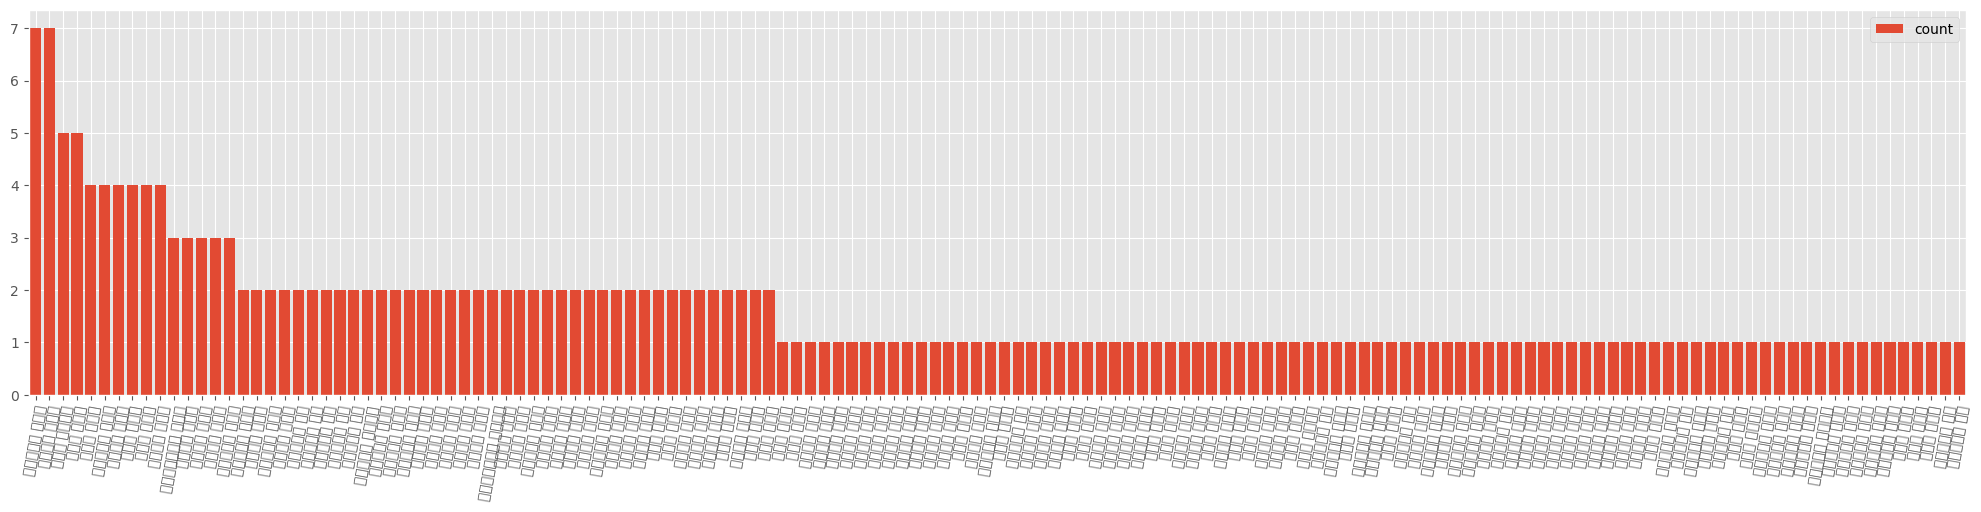

In [256]:
MC_ratio = local_MC_Population[['시도군구','count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind='bar', rot=80)
plt.bar(range(len(MC_ratio)),  MC_ratio['count'], align='center')
plt.xticks(range(len(MC_ratio)), list(MC_ratio['시도군구']), rotation='75')

plt.show()

####   (2) 행정구역별 인구수 대비 공공보건의료기관 비율 바 차트 

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 75

/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  func(*args, **kwargs)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args, **kwargs)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages

/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from

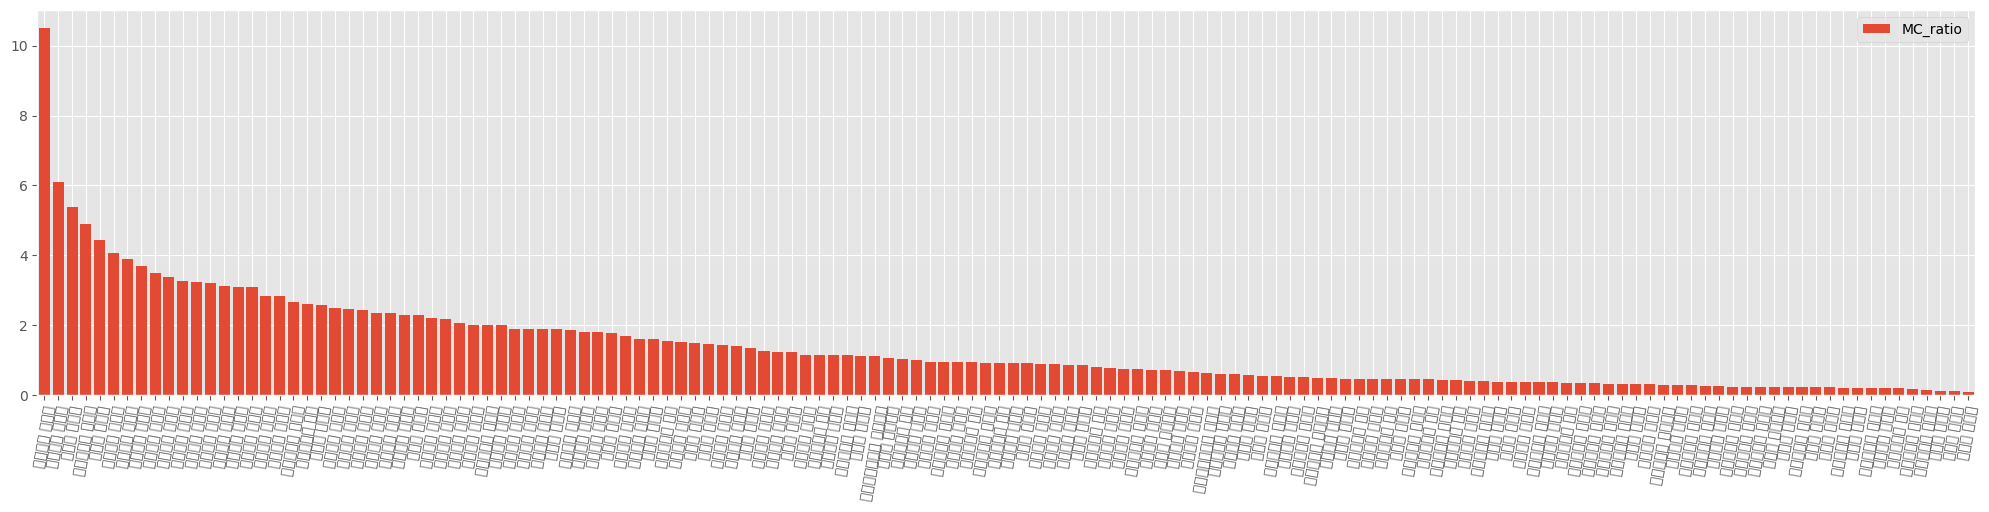

In [133]:
MC_ratio = local_MC_Population[['시도군구','MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False)
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind='bar', rot=80)
plt.bar(range(len(MC_ratio)),  MC_ratio['MC_ratio'], align='center')
plt.xticks(range(len(MC_ratio)), list(MC_ratio['시도군구']), rotation='75')

plt.show()

## 2) 블록맵 시각화

###  블록맵 데이터 파일 열기

In [257]:
import os
path = os.getcwd()

In [258]:
data_draw_korea = pd.read_csv('data_draw_korea.csv', index_col=0, encoding='UTF-8', engine='python')

data_draw_korea.head()   #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


###   블록맵 데이터 파일에 '시도군구' 컬럼 만들기

In [259]:
data_draw_korea['시도군구']= data_draw_korea.apply(lambda r: r['광역시도'] + ' ' + r['행정구역'], axis=1)

data_draw_korea  #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역,시도군구
0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군
2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시
4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시
...,...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시,충청북도 제천시
225,34480,증평,6,11,81.84,충청북도,증평군,충청북도 증평군
226,62809,진천,5,11,406.08,충청북도,진천군,충청북도 진천군
227,790216,청주,6,12,932.51,충청북도,청주시,충청북도 청주시


###  블록맵데이터프레임과 local_MC_Population을 병합하기

In [260]:
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea,local_MC_Population,  how='left',  left_on='시도군구', right_on='시도군구')

data_draw_korea_MC_Population_all

,인구수,shortName,x,y,면적,광역시도,행정구역,시도군구,count,총인구수 (명),MC_ratio
0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시,4.0,213328.0,1.875047
1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군,NaN,NaN,NaN
2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시,1.0,90417.0,1.105987
3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시,1.0,66806.0,1.496872
4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시,1.0,81840.0,1.221896
...,...,...,...,...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시,충청북도 제천시,1.0,134359.0,0.744275
225,34480,증평,6,11,81.84,충청북도,증평군,충청북도 증평군,NaN,NaN,NaN
226,62809,진천,5,11,406.08,충청북도,진천군,충청북도 진천군,NaN,NaN,NaN
227,790216,청주,6,12,932.51,충청북도,청주시,충청북도 청주시,4.0,840047.0,0.476164


###  한국지도의 블록맵 경계선 좌표를 리스트로 생성 

In [261]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

### 블록맵에서 블록에 해당 데이터를 매핑하여 색을 표시하는 함수

In [262]:
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')
    
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    
    plt.savefig('blockMap_' + targetData + '.png')
                      
    
    plt.show()      

###   함수를 호출하여 블록맵 생성하기

- 행정구역별 의료기관 수에 대한 블록맵

/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: U

/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing 

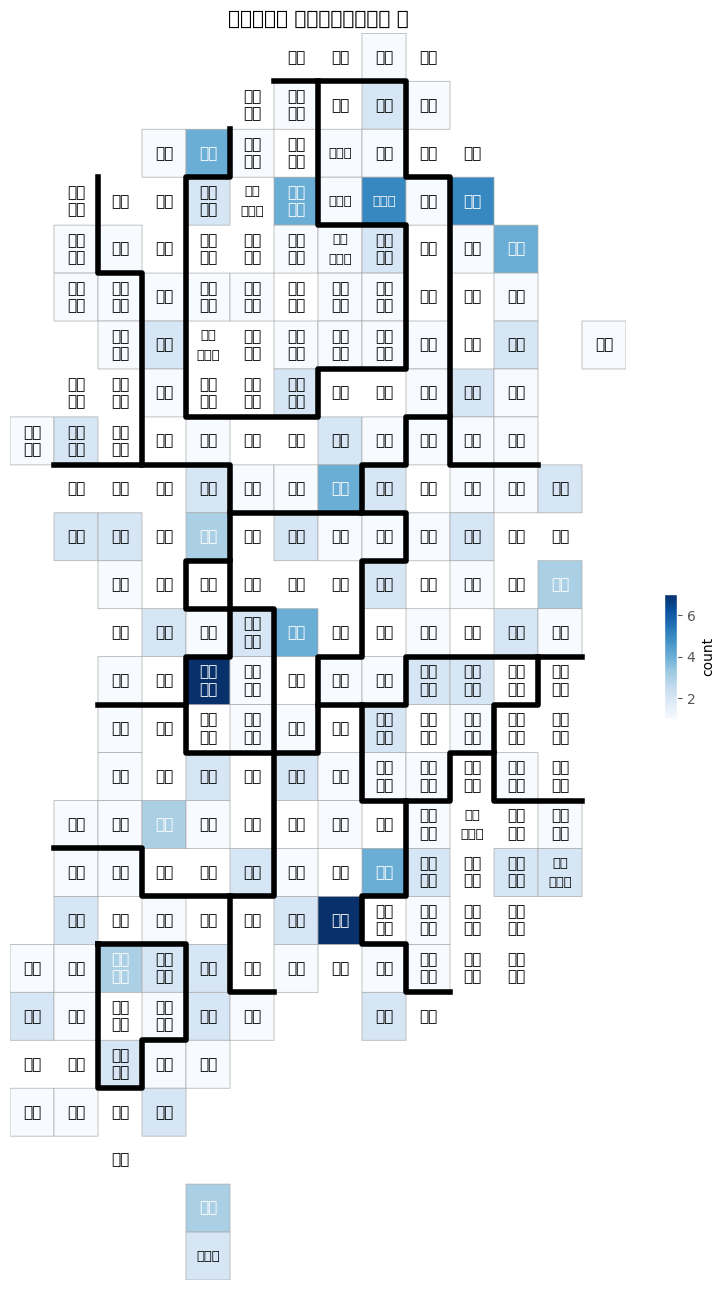

In [263]:
draw_blockMap(data_draw_korea_MC_Population_all, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

#####     - 행정구역별 인구에 대한 의료기관 비율에 대한 블록맵

/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: U

/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


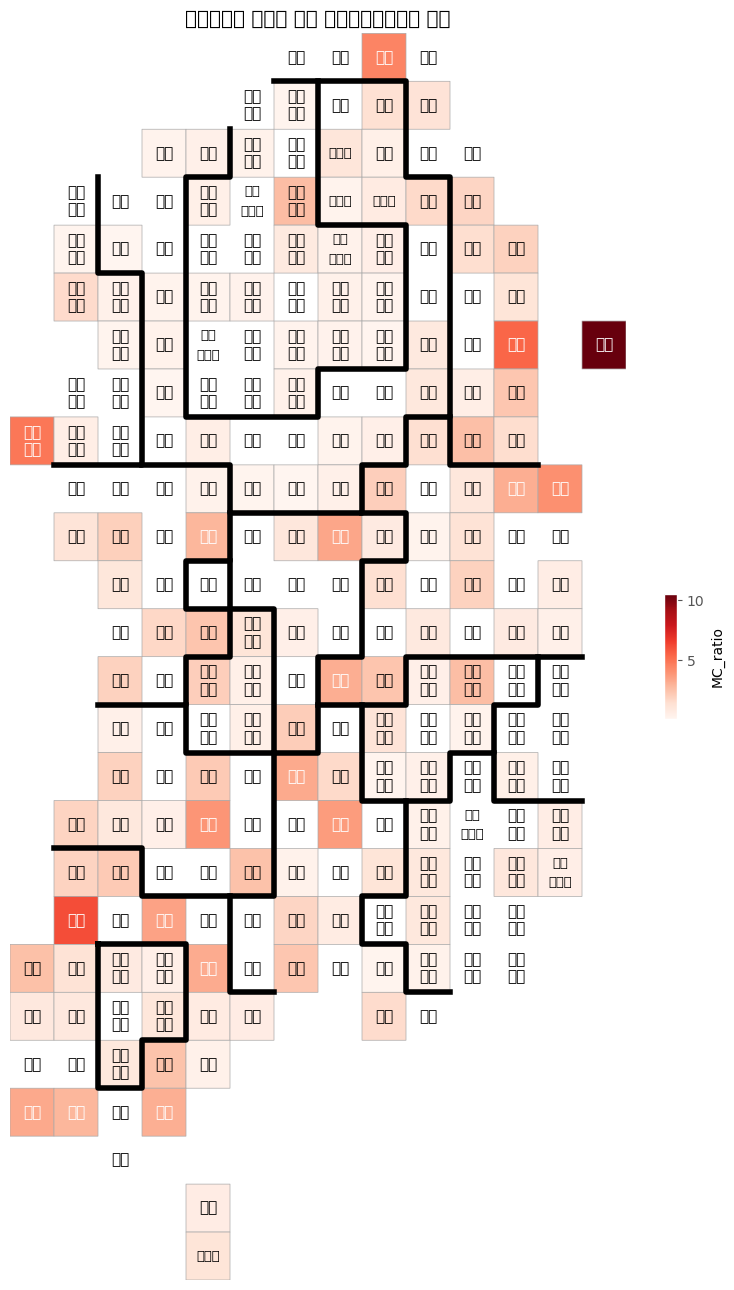

In [142]:
draw_blockMap(data_draw_korea_MC_Population_all, 'MC_ratio', '행정구역별 인구수 대비 공공보건의료기관 비율', 'Reds' )

### 과제 4 (2점)  : 인구대비 병상 수를  구해 블록맵을 그리시오



/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWarning: Glyph 48337 (\N{HANGUL SYLLABLE BYEONG}) missing from current font.
  plt.tight_layout()
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_24902/2519596021.py:50: UserWar

/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siyeonson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48337 (\N{HANGUL SYLLABLE BYEONG}) missing from c

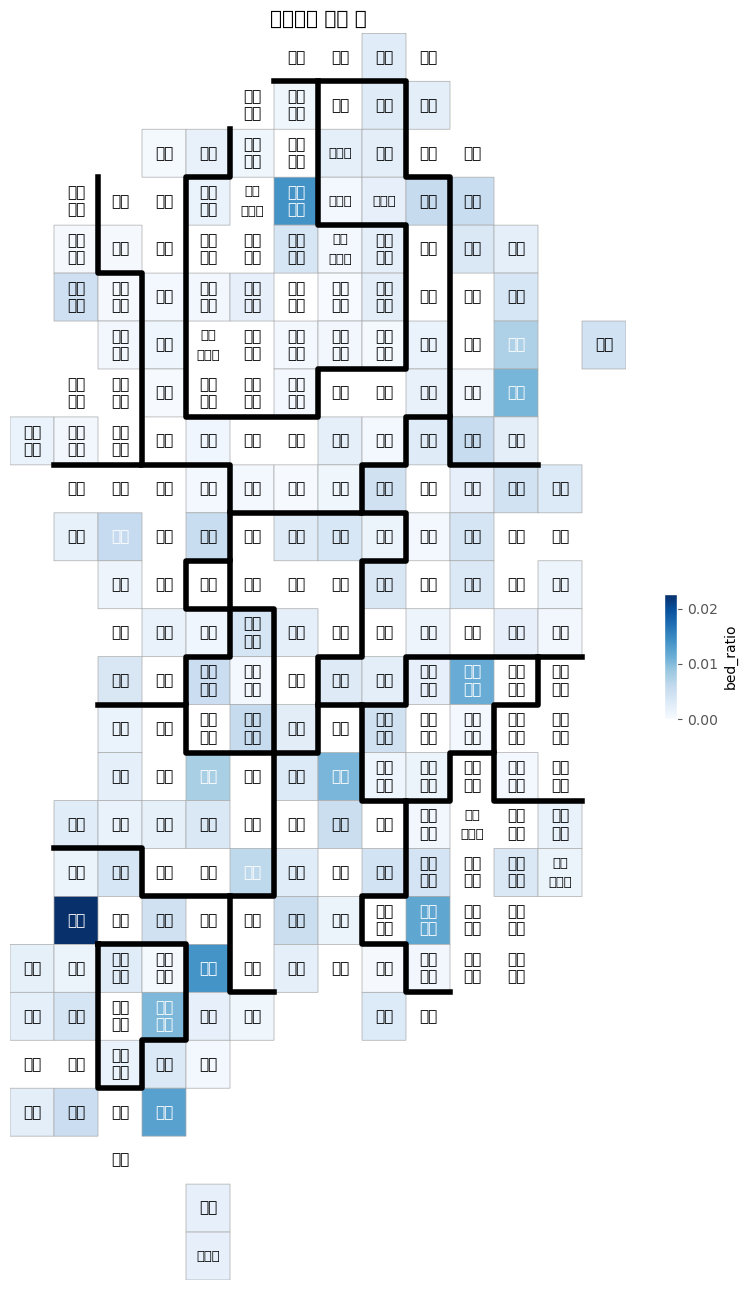

In [229]:
data = pd.read_csv('공공보건의료기관현황.csv', index_col=0, encoding='CP949', engine='python')
addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns=('광역시도', '시군구'))

# 잘못된 광역시도 이름 수정하기
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', '대전시':'대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}
addr['광역시도']= addr['광역시도'].apply(lambda v: addr_aliases.get(v, v))

# 잘못된 시군구 이름 수정하기
addr.iloc[75] = ['제주특별자치도', '제주시']
addr.iloc[155] = ['부산광역시', '사하구']
addr.iloc[110] = ['충청북도', '청원구']
addr['시도군구'] = addr.apply(lambda r: r['광역시도'] + ' ' + r['시군구'], axis=1)

# '병상수' 추가
addr2 = pd.DataFrame(data['병상수'], columns=['병상수'])
addr2 = addr2.reset_index()
addr = pd.concat([addr, addr2], axis=1)
addr

# 시군군구의 병상 수 계산
addr_group = pd.DataFrame(addr.groupby('시도군구', as_index=False)['병상수'].sum())
addr_group

# 행정구역 별 인구수 데이터 추가
population = pd.read_excel('행정구역_시군구_별__성별_인구수_2.xlsx')
population['시도군구']= population.apply(lambda r: r['행정구역(시군구)별(1)'] + ' ' + r['행정구역(시군구)별(2)'].strip(), axis=1)
addr_population_merge = pd.merge(addr_group, population,  how='inner',  left_on='시도군구', right_on='시도군구')
addr_population_merge

# 필요한 컬럼만 추출
local_bed_Population = addr_population_merge[['시도군구', '병상수', '총인구수 (명)']]
local_bed_Population

# 시도군구의 인구대비 병상수 비율 구하기
local_bed_Population['bed_ratio'] = local_bed_Population['병상수']/local_bed_Population['총인구수 (명)']


# 블록맵 시각화
import os
path = os.getcwd()
data_draw_korea = pd.read_csv('data_draw_korea.csv', index_col=0, encoding='UTF-8', engine='python')
data_draw_korea['시도군구']= data_draw_korea.apply(lambda r: r['광역시도'] + ' ' + r['행정구역'], axis=1)

# 병합
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea, local_bed_Population,  how='left',  left_on='시도군구', right_on='시도군구')
data_draw_korea_MC_Population_all


# 블록맵 함수 호출
draw_blockMap(data_draw_korea_MC_Population_all, 'bed_ratio', '인구대비 병상 수', 'Blues')